# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# # find the closest restaurant of each type to coordinates

# base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# params = {
#     "location": "39.952583,-75.16522",  # philadelphia coords
#     "rankby": "distance",
#     "type": "restaurant",
#     "key": gkey,
# }
# # use iterrows to iterate through pandas dataframe
# for index, row in types_df.iterrows():

#     # get restaurant type from df
#     restr_type = row['ethnicity']

#     # add keyword to params dict
#     params['keyword'] = restr_type

#     # assemble url and make API request
#     print(f"Retrieving Results for Index {index}: {restr_type}.")
#     response = requests.get(base_url, params=params).json()
    
#     # extract results
#     results = response['results']
    
#     try:
#         print(f"Closest {restr_type} restaurant is {results[0]['name']}.")
        
#         types_df.loc[index, 'name'] = results[0]['name']
#         types_df.loc[index, 'address'] = results[0]['vicinity']
#         types_df.loc[index, 'price_level'] = results[0]['price_level']
#         types_df.loc[index, 'rating'] = results[0]['rating']
        
#     except (KeyError, IndexError):
#         print("Missing field/result... skipping.")
        
#     print("------------")

In [11]:
citiesweather =[]
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&q="
limit = 1
for i in cities:
    query_url = f"{url}{i}&limit={limit}&appid={weather_api_key}"
    weather_response =requests.get(query_url)
    weather_json = weather_response.json()
    try: 
#         print(f"{index} City is{results[0](cities)}.")
        weather_data ={
        "City": weather_json["name"],
        "Lat" : weather_json["coord"]["lat"],
        "Lng" : weather_json["coord"]["lon"],
        "Max Temp(f)": weather_json["main"]["temp_max"],
        "Humidity": weather_json["main"]["humidity"],
        "Cloudiness": weather_json["clouds"]["all"],
        "Wind Speed": weather_json["wind"]["speed"],
        "Country" : weather_json["sys"]["country"],
        "Date": weather_json["dt"]}
        citiesweather.append(weather_data) 
        
        
    except:
        print("City not found. Skipping...")
# see gitlab starter code [ results as a variable needs to be replaced with another variable]

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [12]:
weather_data =pd.DataFrame(citiesweather)
weather_data.count()

City           551
Lat            551
Lng            551
Max Temp(f)    551
Humidity       551
Cloudiness     551
Wind Speed     551
Country        551
Date           551
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame
weather_data.to_csv("output_data/cities.csv",encoding="utf-8", index=True, header=True)
weather_data.display()

In [13]:
# Export the city data into a .csv.
# Display the DataFrame 
weather_data.to_csv("output_data/cities.csv",encoding="utf-8", index=True, header=True) 
print(weather_data)

                 City      Lat       Lng  Max Temp(f)  Humidity  Cloudiness  \
0      Port Elizabeth -33.9180   25.5701        49.32        88           0   
1          Nanortalik  60.1432  -45.2371        45.36        76         100   
2             Rikitea -23.1203 -134.9692        73.11        74           5   
3           Kavaratti  10.5669   72.6420        77.22        88         100   
4         Tuktoyaktuk  69.4541 -133.0374        53.60        87          75   
..                ...      ...       ...          ...       ...         ...   
546     Arroyo Grande  35.1186 -120.5907        88.54        65           0   
547           Bubaque  11.2833  -15.8333        79.18        82          91   
548          Tessalit  20.1986    1.0114        93.34        26           5   
549  Vigía del Fuerte   6.5789  -76.8863        74.50        97         100   
550  Highland Springs  37.5460  -77.3278        81.32        92          40   

     Wind Speed Country        Date  
0          3.

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
dryweather_data=weather_data[weather_data["Humidity"] <100]
dryweather_data.count()


City           540
Lat            540
Lng            540
Max Temp(f)    540
Humidity       540
Cloudiness     540
Wind Speed     540
Country        540
Date           540
dtype: int64

In [15]:
#  Get the indices of cities that have humidity over 100%.
moistweather_data=weather_data[weather_data["Humidity"]>100]
moistweather_data.head()


,City,Lat,Lng,Max Temp(f),Humidity,Cloudiness,Wind Speed,Country,Date


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=dryweather_data.rename(mapper=None, index=str, columns=None, axis=None, copy=True, inplace=False, level=None)
display(clean_city_data)


,City,Lat,Lng,Max Temp(f),Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,49.32,88,0,3.44,ZA,1659400556
1,Nanortalik,60.1432,-45.2371,45.36,76,100,8.59,GL,1659400711
2,Rikitea,-23.1203,-134.9692,73.11,74,5,25.79,PF,1659400367
3,Kavaratti,10.5669,72.6420,77.22,88,100,27.45,IN,1659400575
4,Tuktoyaktuk,69.4541,-133.0374,53.60,87,75,16.11,CA,1659401003
...,...,...,...,...,...,...,...,...,...
546,Arroyo Grande,35.1186,-120.5907,88.54,65,0,10.36,US,1659401201
547,Bubaque,11.2833,-15.8333,79.18,82,91,14.65,GW,1659401201
548,Tessalit,20.1986,1.0114,93.34,26,5,13.44,ML,1659401202
549,Vigía del Fuerte,6.5789,-76.8863,74.50,97,100,1.05,CO,1659401202


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [17]:
# MODEL CODE FROM ASK BCS
# plt.scatter(lats,
#            max_temps,
#            edgecolor="black", linewidths=1, marker="o",
#            alpha=0.8, label="Cities")
# # Incorporate the other graph properties
# plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
# plt.ylabel("Max Temperature (F)")
# plt.xlabel("Latitude")
# plt.grid(True)
# # Save the figure
# plt.savefig("output_data/Fig1.png")
# # Show plot
# plt.show()

# Also please try to have
# % matplotlib inline

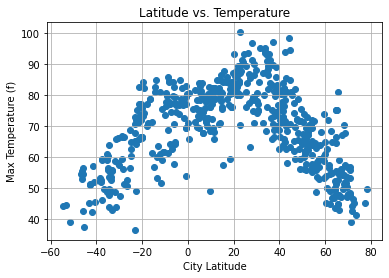

In [18]:
# # make the data
x = clean_city_data["Lat"]
y = clean_city_data["Max Temp(f)"]


# # plot
plt.scatter(x, y, vmin=0, vmax=100)

plt.title("Latitude vs. Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (f)")
plt.grid(True)
# plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

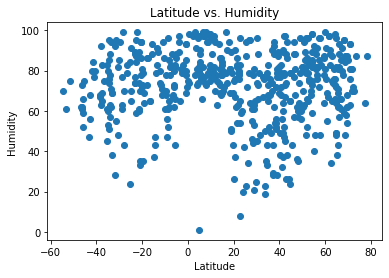

In [19]:
# # make the data
a = clean_city_data["Lat"]
b = clean_city_data["Humidity"]

plt.scatter(a, b, vmin=0, vmax=100)

# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

## Latitude vs. Cloudiness Plot

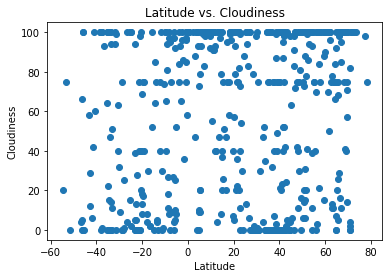

In [20]:

# # make the data
c = clean_city_data["Lat"]
d = clean_city_data["Cloudiness"]

# # size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# # plot
fig, ax = plt.subplots()

ax.scatter(c, d, vmin=0, vmax=100)

# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

## Latitude vs. Wind Speed Plot

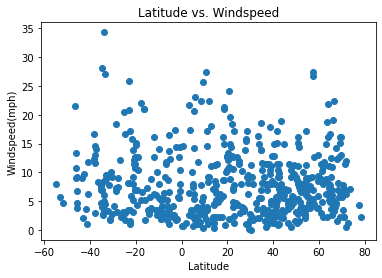

In [21]:
# # make the data
x = clean_city_data["Lat"]
y = clean_city_data["Wind Speed"]

# # size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# # plot
fig, ax = plt.subplots()

ax.scatter(x, y, vmin=0, vmax=100)

# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")

plt.show()

## Linear Regression


In [22]:
x=clean_city_data["Lat"]
# filter into =>1 and above = Northern Hemisphere
NHemi=clean_city_data.loc[clean_city_data["Lat"] >= 0]
#filter into =<1 and below = Southern Hemisphere
SHemi=clean_city_data.loc[clean_city_data["Lat"] <= 0]
# NHemi.count()
# 409
# SHemi.count()
# 184

In [23]:
x

0     -33.9180
1      60.1432
2     -23.1203
3      10.5669
4      69.4541
        ...   
546    35.1186
547    11.2833
548    20.1986
549     6.5789
550    37.5460
Name: Lat, Length: 540, dtype: float64

In [24]:
y

0       3.44
1       8.59
2      25.79
3      27.45
4      16.11
       ...  
546    10.36
547    14.65
548    13.44
549     1.05
550     6.91
Name: Wind Speed, Length: 540, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4519796658492132


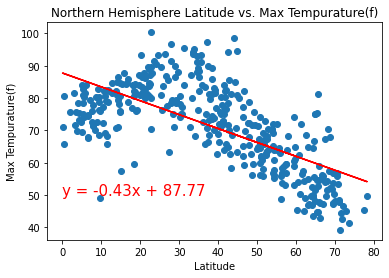

In [25]:
# # make the data
x = NHemi["Lat"]
y = NHemi["Max Temp(f)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Max Tempurature(f)")
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature(f)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.747947523720187


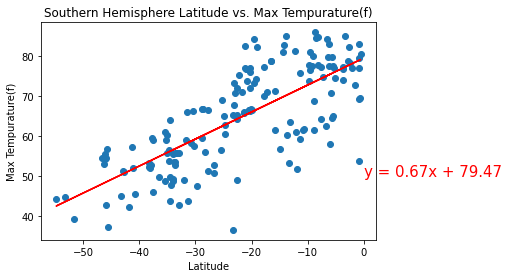

In [26]:
# # make the data
x = SHemi["Lat"]
y = SHemi["Max Temp(f)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# ax.set(xlim=(0, 80), xticks=np.arange(10, 80),
#        ylim=(0, 100), yticks=np.arange(1, 100))
# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere Latitude vs. Max Tempurature(f)")
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature(f)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.06514821519987735


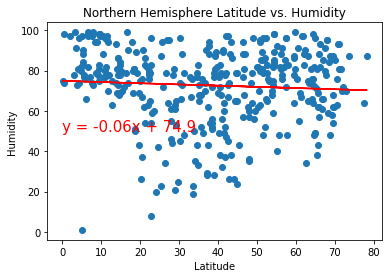

In [27]:
# # make the data
x = NHemi["Lat"]
y = NHemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# ax.set(xlim=(0, 80), xticks=np.arange(10, 80),
#        ylim=(0, 100), yticks=np.arange(1, 100))
# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19176926367423852


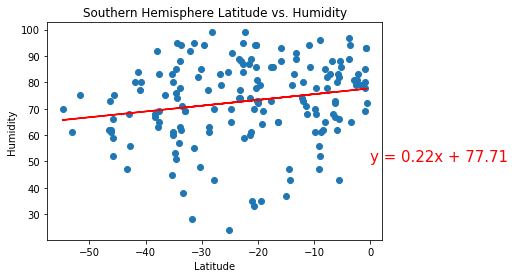

In [28]:
# # make the data
x = SHemi["Lat"]
y = SHemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# ax.set(xlim=(0, 80), xticks=np.arange(10, 80),
#        ylim=(0, 100), yticks=np.arange(1, 100))
# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.024587889847722724


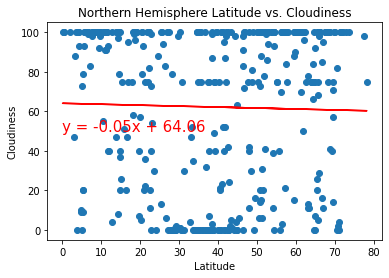

In [29]:
# # make the data
x = NHemi["Lat"]
y = NHemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14891221896766801


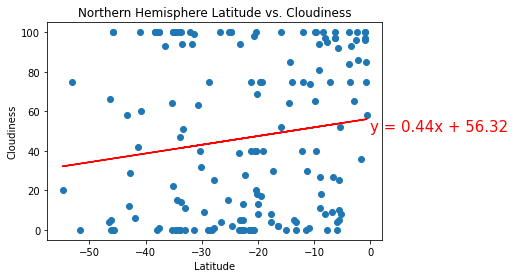

In [30]:
# # make the data
x = SHemi["Lat"]
y = SHemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.004961287095155038


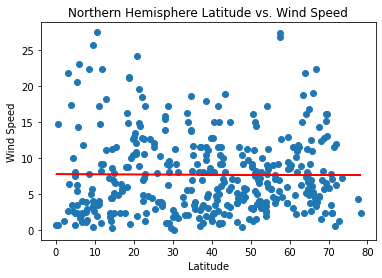

In [31]:
# # make the data
x = NHemi["Lat"]
y = NHemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1103185762118036


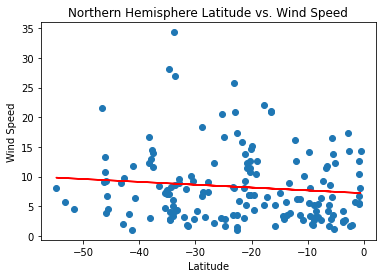

In [32]:
# # make the data
x = SHemi["Lat"]
y = SHemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()